In [8]:
from astropy.table import Table
from astropy.io import fits
from astropy.time import Time
import matplotlib.pyplot as plt
import numpy as np

# Replace with the path to your file
lc_file_path = "../products/0865600201/pn/lc/pn_source_lc_corrected.fits"

# Read the RATE table to get time and rate columns
with fits.open(lc_file_path) as hdul:
    lc_table = Table(hdul[1].data)
# Extract time and rate
time = lc_table['TIME']
rate = lc_table['RATE']

# Get the observation start time from the header
with fits.open(lc_file_path) as hdul:
    header = hdul[1].header
    expstart_time = Time(header['TSTART'], format='mjd')
# Convert time to relative seconds from the start of the observation
time_relative = (time - header['TSTART'])




<IPython.core.display.Javascript object>

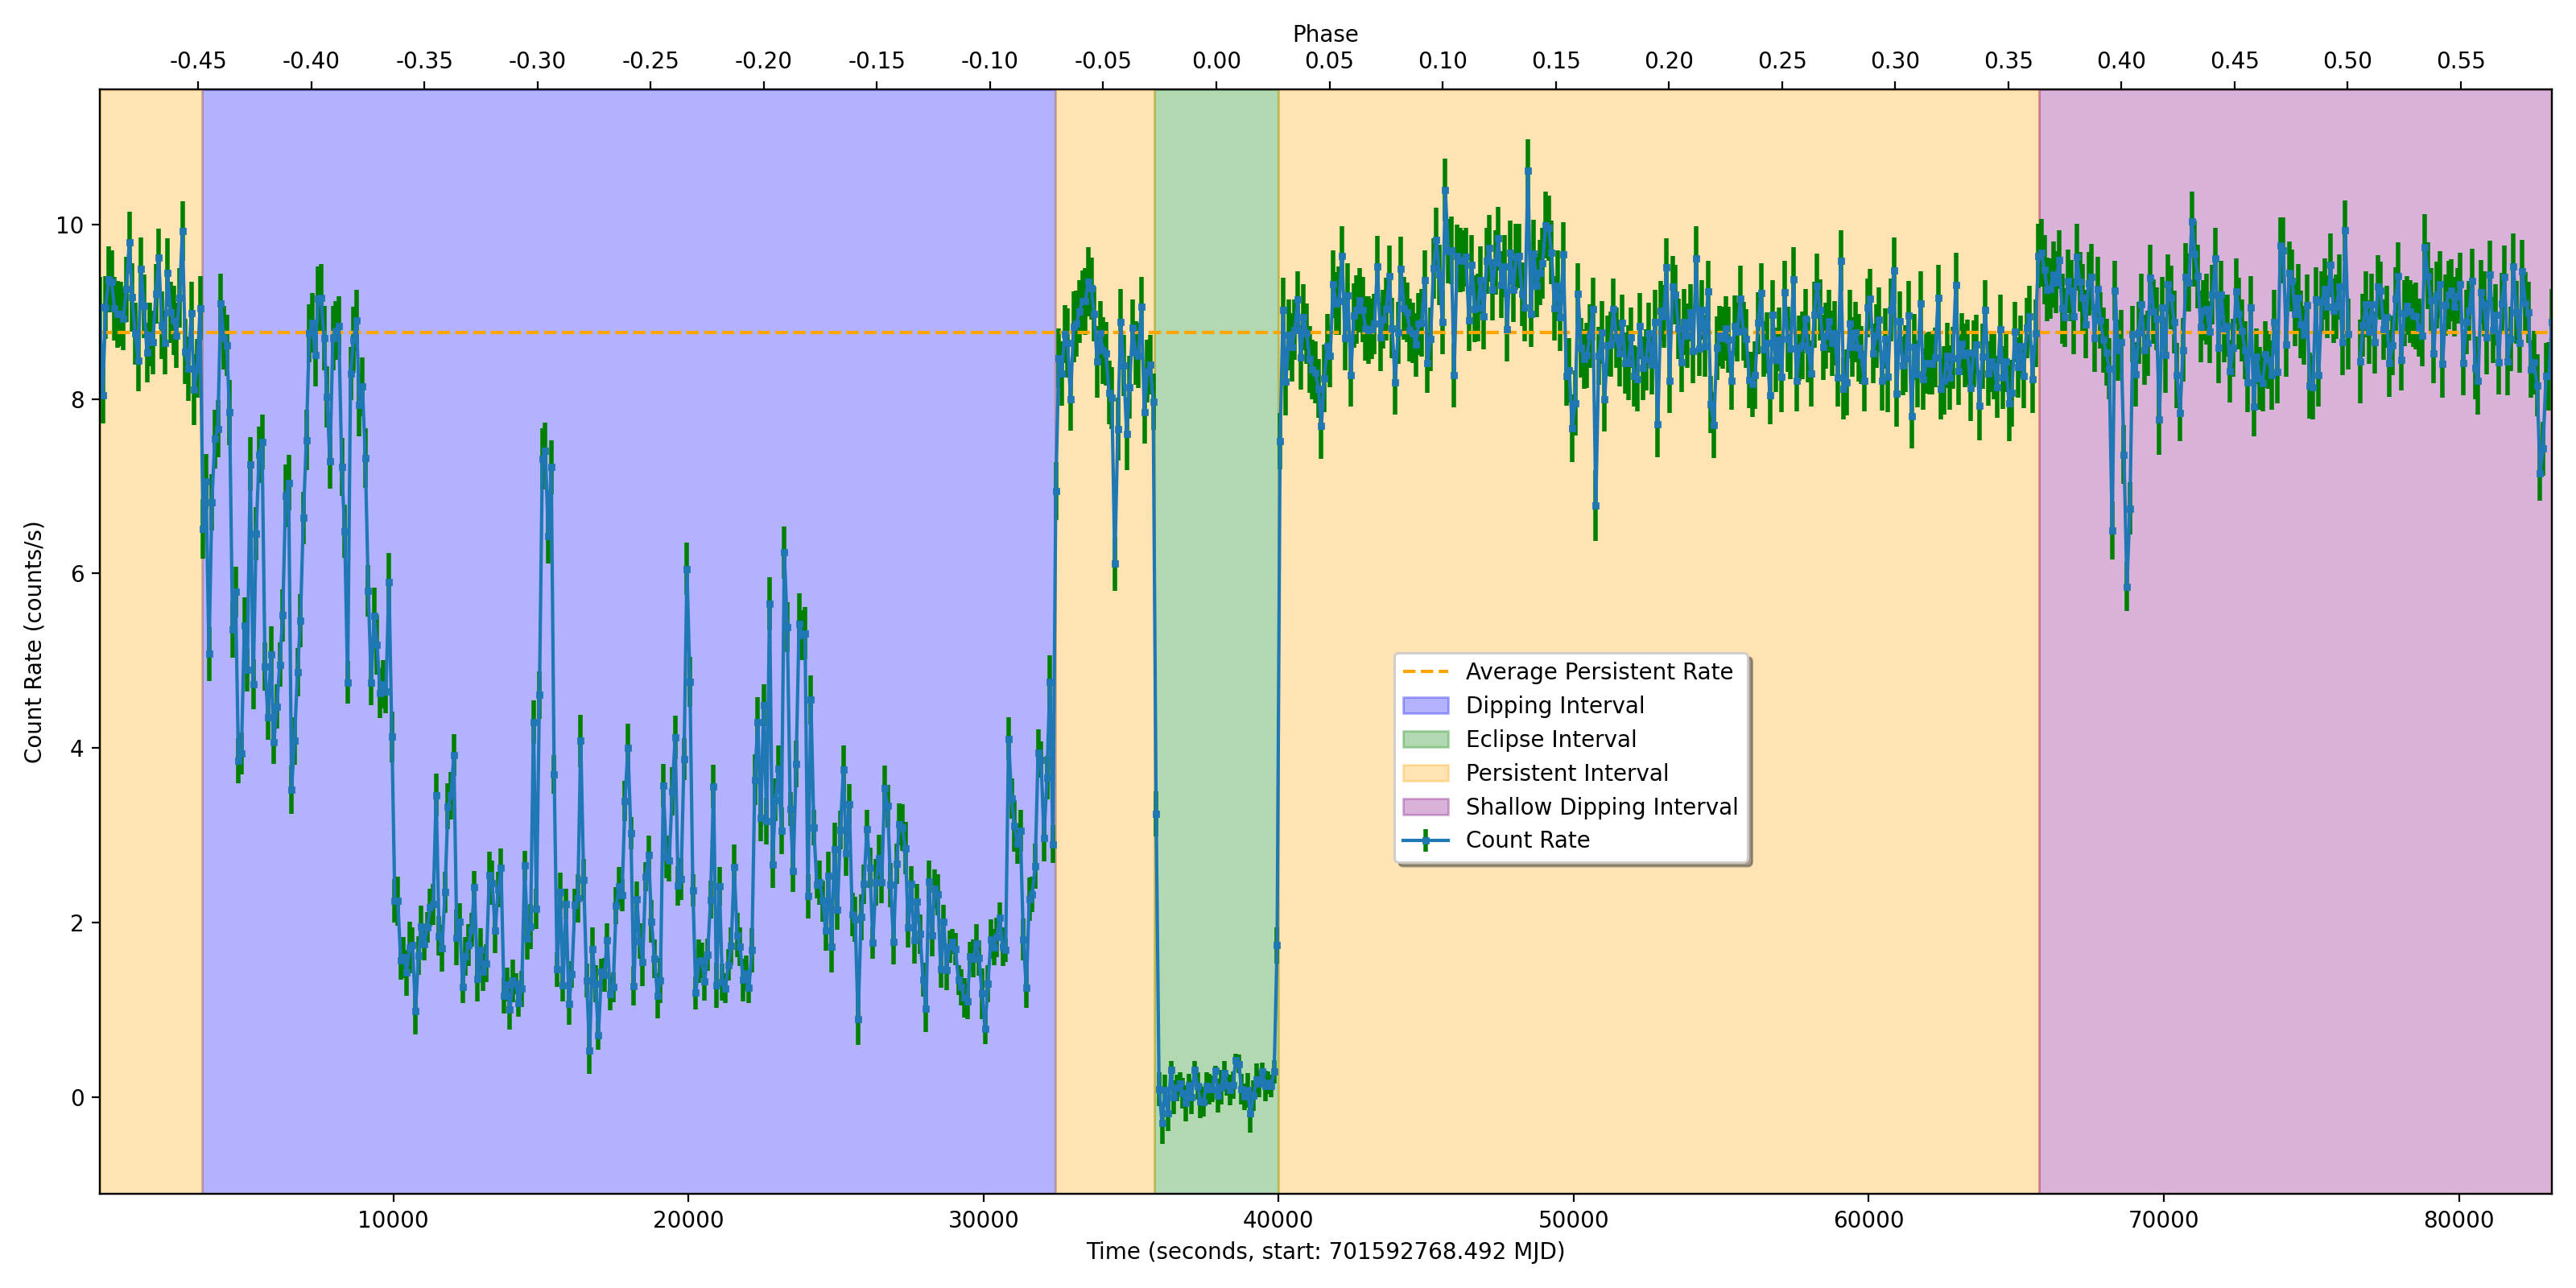

In [9]:
%matplotlib notebook

fig, ax1 = plt.subplots(figsize=(16,8), dpi=200)
ax1.errorbar(time_relative, rate, yerr=lc_table['ERROR'], fmt='s-', markersize=2, alpha=1, elinewidth=2,ecolor='green',label='Count Rate')
ax1.set_xlabel(f'Time (seconds, start: {expstart_time.mjd:.3f} MJD)')
ax1.set_ylabel('Count Rate (counts/s)')


#define dipping, eclipse, and persistent intervals
persistent_intervals = [(time_relative[0],3510),(32430,35780),(40000, 65760)]
dipping_intervals = (3510, 32430)
eclipse_intervals = (35780, 40000)
shallow_dip_interval = (65760, time_relative[-1])


#average count rate for both persistent intervals
persistent_mask = ((time_relative >= persistent_intervals[0][0]) & (time_relative <= persistent_intervals[0][1])) | \
                  ((time_relative >= persistent_intervals[1][0]) & (time_relative <= persistent_intervals[1][1]) | \
                  ((time_relative >= persistent_intervals[2][0]) & (time_relative <= persistent_intervals[2][1])))
persistent_rate = rate[persistent_mask]
average_persistent_rate = persistent_rate.mean()
ax1.hlines(average_persistent_rate, time_relative[0], time_relative[-1], colors='orange', linestyles='dashed', label='Average Persistent Rate')



# Highlight intervals
ax1.axvspan(dipping_intervals[0], dipping_intervals[1], color='blue', alpha=0.3, label='Dipping Interval')

ax1.axvspan(eclipse_intervals[0], eclipse_intervals[1], color='green', alpha=0.3, label='Eclipse Interval')

ax1.axvspan(persistent_intervals[0][0], persistent_intervals[0][1], color='orange', alpha=0.3, label='Persistent Interval')
ax1.axvspan(persistent_intervals[1][0], persistent_intervals[1][1], color='orange', alpha=0.3)
ax1.axvspan(persistent_intervals[2][0], persistent_intervals[2][1], color='orange', alpha=0.3)

ax1.axvspan(shallow_dip_interval[0], shallow_dip_interval[1], color='purple', alpha=0.3, label='Shallow Dipping Interval')

ax1.legend(fancybox=True,shadow=True,loc='upper center', bbox_to_anchor=(0.6, 0.5))
ax1.set_xlim(time_relative[0], time_relative[-1])
ax1.set_ylim(None,None)

# Add top axis for phase
ax2 = ax1.twiny() # create a second x-axis on top
period_seconds = 21.3 * 3600
t0 = (eclipse_intervals[0] + eclipse_intervals[1]) / 2  # Midpoint of the eclipse interval

def time_to_phase(t):
    return (t - t0) / period_seconds

ax2.set_xlabel("Phase")
# Get limits from ax1 and transform them for ax2
ax2.set_xlim(time_to_phase(ax1.get_xlim()[0]), time_to_phase(ax1.get_xlim()[1]))

ax2.xaxis.set_ticks_position('top')
ax2.xaxis.set_label_position('top')

# Set ticks at intervals of 0.05
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
ax2.xaxis.set_major_locator(MultipleLocator(0.05))
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.tight_layout()
plt.savefig('lc.png', dpi=200)
plt.close()
from IPython.display import Image, display
display(Image('lc.png'), width=800)

Orbital period: 21.3 hr
Dipping interval ~ 28920 s (8.03 hr), roughly 37.7% of the orbital period.
Implies extensive structure in the accretion disk.
Shallow dipping (?) region from ~>65000 s might be edge of structure causing shallow dips.




In [10]:
# Replace with the path to your file
lc_file_path = "../products/0865600201/pn/lc/pn_source_lc_raw.fits"

# Read the RATE table to get time and rate columns
with fits.open(lc_file_path) as hdul:
    lc_table = Table(hdul[1].data)
# Extract time and rate
time = lc_table['TIME']
rate = lc_table['RATE']

# Get the observation start time from the header
with fits.open(lc_file_path) as hdul:
    header = hdul[1].header
    expstart_time = Time(header['TSTART'], format='mjd')
# Convert time to relative seconds from the start of the observation
time_relative = (time - header['TSTART'])


<IPython.core.display.Javascript object>

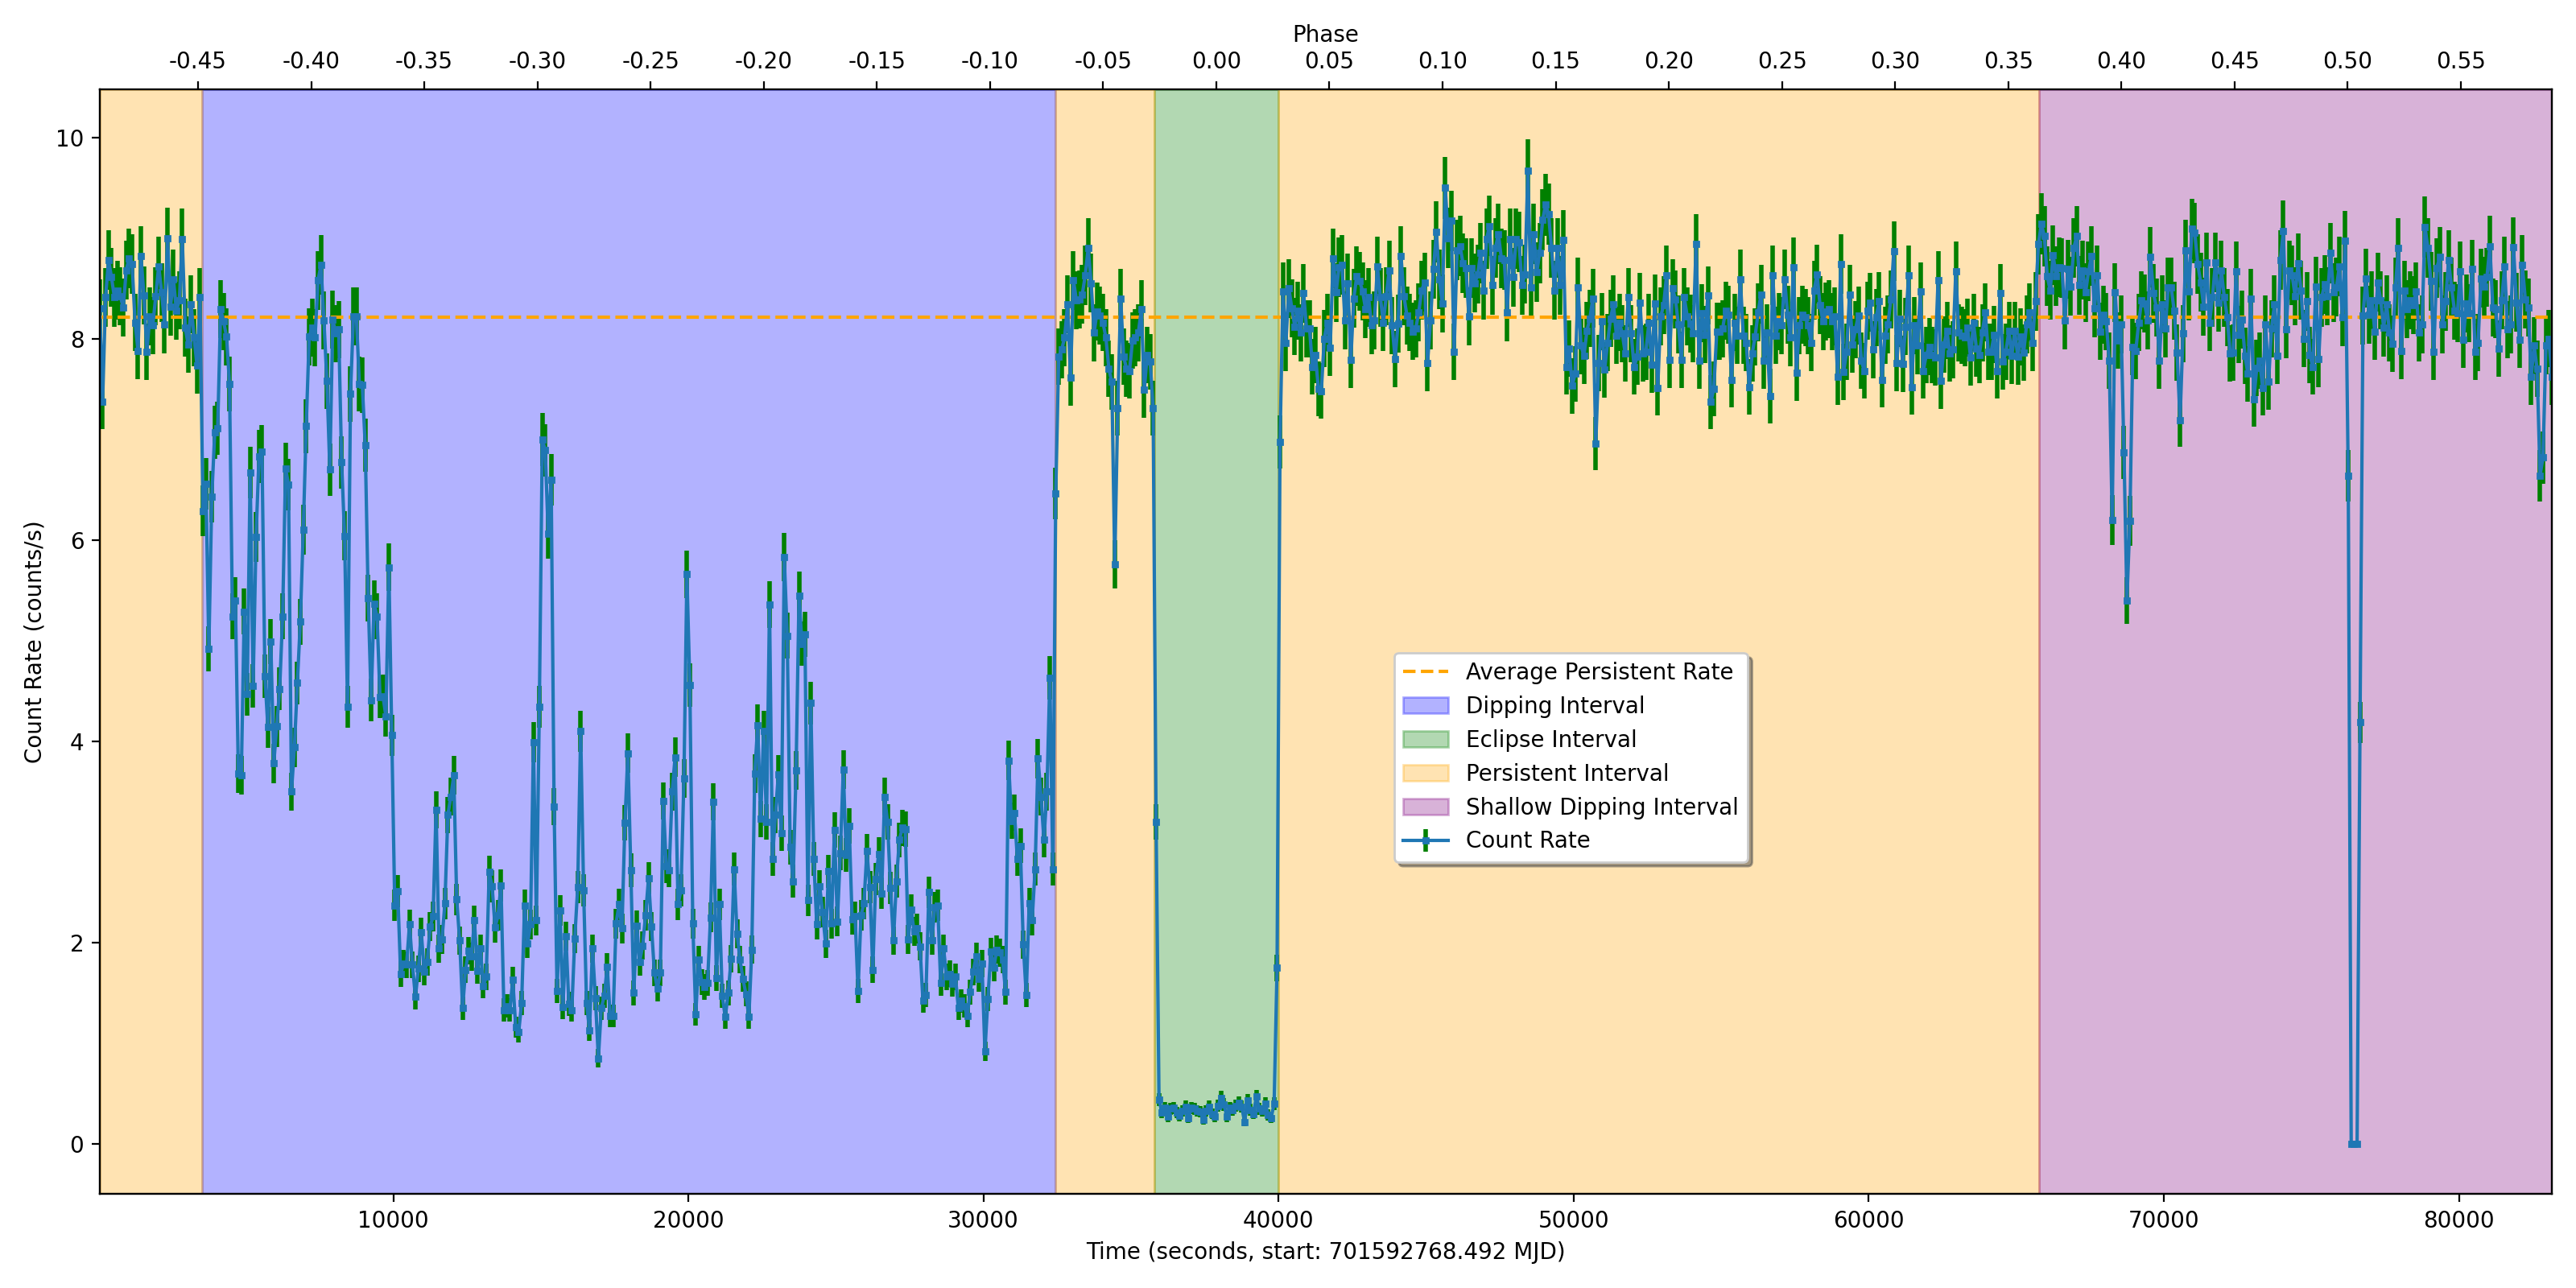

In [11]:
%matplotlib notebook

fig, ax1 = plt.subplots(figsize=(16,8), dpi=100)
ax1.errorbar(time_relative, rate, yerr=lc_table['ERROR'], fmt='s-', markersize=2, alpha=1, elinewidth=2,ecolor='green',label='Count Rate')
ax1.set_xlabel(f'Time (seconds, start: {expstart_time.mjd:.3f} MJD)')
ax1.set_ylabel('Count Rate (counts/s)')




#average count rate for both persistent intervals
persistent_mask = ((time_relative >= persistent_intervals[0][0]) & (time_relative <= persistent_intervals[0][1])) | \
                  ((time_relative >= persistent_intervals[1][0]) & (time_relative <= persistent_intervals[1][1]) | \
                  ((time_relative >= persistent_intervals[2][0]) & (time_relative <= persistent_intervals[2][1])))
persistent_rate = rate[persistent_mask]
average_persistent_rate = persistent_rate.mean()
ax1.hlines(average_persistent_rate, time_relative[0], time_relative[-1], colors='orange', linestyles='dashed', label='Average Persistent Rate')



# Highlight intervals
ax1.axvspan(dipping_intervals[0], dipping_intervals[1], color='blue', alpha=0.3, label='Dipping Interval')

ax1.axvspan(eclipse_intervals[0], eclipse_intervals[1], color='green', alpha=0.3, label='Eclipse Interval')

ax1.axvspan(persistent_intervals[0][0], persistent_intervals[0][1], color='orange', alpha=0.3, label='Persistent Interval')
ax1.axvspan(persistent_intervals[1][0], persistent_intervals[1][1], color='orange', alpha=0.3)
ax1.axvspan(persistent_intervals[2][0], persistent_intervals[2][1], color='orange', alpha=0.3)

ax1.axvspan(shallow_dip_interval[0], shallow_dip_interval[1], color='purple', alpha=0.3, label='Shallow Dipping Interval')

ax1.legend(fancybox=True,shadow=True,loc='upper center', bbox_to_anchor=(0.6, 0.5))
ax1.set_xlim(time_relative[0], time_relative[-1])
ax1.set_ylim(None,None)

# Add top axis for phase
ax2 = ax1.twiny() # create a second x-axis on top

ax2.set_xlabel("Phase")
# Get limits from ax1 and transform them for ax2
ax2.set_xlim(time_to_phase(ax1.get_xlim()[0]), time_to_phase(ax1.get_xlim()[1]))

ax2.xaxis.set_ticks_position('top')
ax2.xaxis.set_label_position('top')

# Set ticks at intervals of 0.05
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
ax2.xaxis.set_major_locator(MultipleLocator(0.05))
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.tight_layout()
plt.savefig('raw_lc.png',dpi=200)
plt.show()
plt.close()

from IPython.display import Image, display
display(Image('raw_lc.png'), width=800)